In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install missingno
import missingno as msno
import seaborn as sns

In [367]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 1000)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.float_format", lambda x:  "%.4f" % x)

# Exploratory Data Analysis

In [368]:
df=pd.read_csv("spam.csv", encoding='latin-1')

<Axes: >

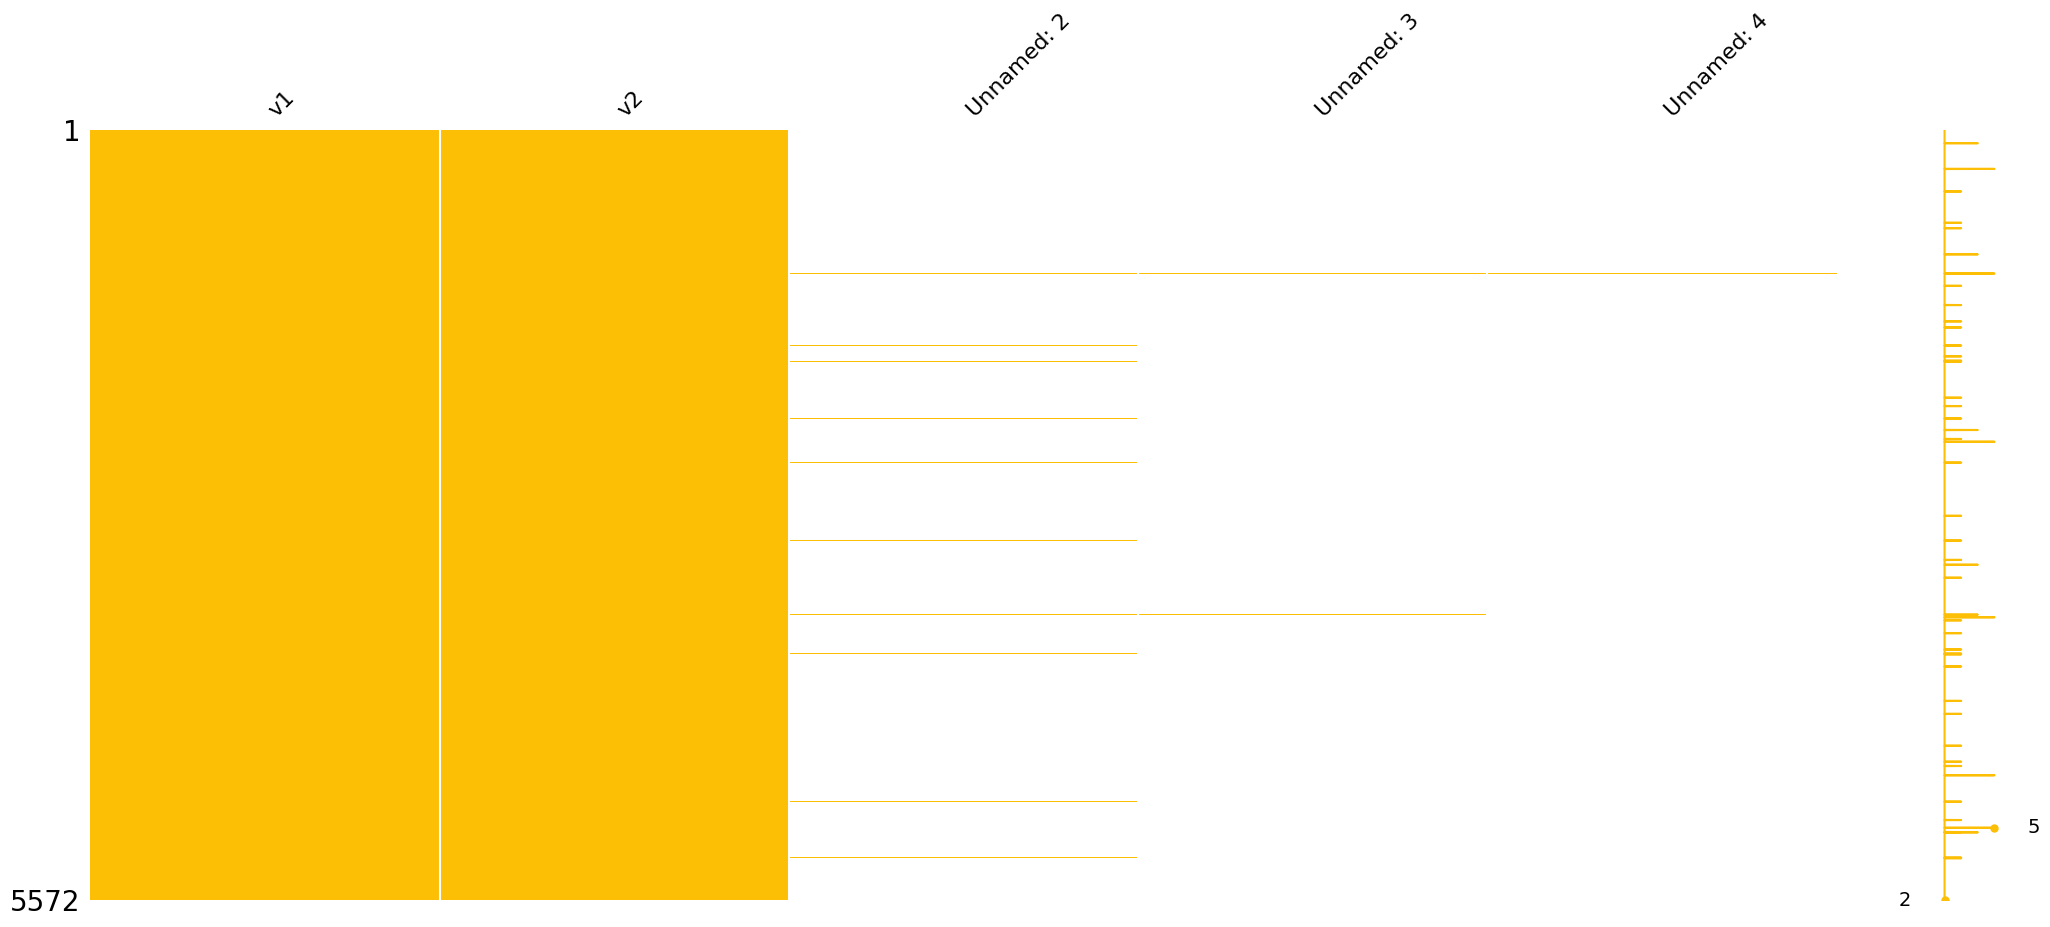

In [ ]:
#null values visilation
msno.matrix(df,color=(0.99, 0.75, 0.023))

In [ ]:
# checking dataset
def check_df(dataframe, head=5):
  print("######### SHAPE ###########")
  print(dataframe.shape)
  print("######## Types #######")
  print(dataframe.dtypes)
  print("######## HEAD #########")
  print(dataframe.head(head))
  print("######### TAİL ########")
  print(dataframe.tail(head))
  print("######## Boş Değerler #####")
  print(dataframe.isnull().sum())

check_df(df)

######### SHAPE ###########
(5572, 5)
######## Types #######
v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object
######## HEAD #########
     v1                                                 v2 Unnamed: 2 Unnamed: 3 Unnamed: 4
0   ham  Go until jurong point, crazy.. Available only ...        NaN        NaN        NaN
1   ham                      Ok lar... Joking wif u oni...        NaN        NaN        NaN
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN        NaN        NaN
3   ham  U dun say so early hor... U c already then say...        NaN        NaN        NaN
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN        NaN        NaN
######### TAİL ########
        v1                                                 v2 Unnamed: 2 Unnamed: 3 Unnamed: 4
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN        NaN        NaN
5568   ham              Will Ì

Variables ***Unnamed 2, Unnamed 3, Unnamed 4*** contain too many empty values, so it is more useful to remove them.

In [ ]:
column_to_delete=[name for name in df.columns if name.startswith('Unnamed')]
df.drop(columns=column_to_delete,inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Rename : v1 to target and v2 to message
df.rename(columns=dict({"v1":"target","v2":"message"}),inplace=True)

In [ ]:
# checking again null values
df.isnull().sum()

target     0
message    0
dtype: int64

In [ ]:
#print no of duplicate records
print("Total duplicated records in dataset are : {}".format(df.duplicated().sum()))

Total duplicated records in dataset are : 403


Total duplicated records in dataset are : 403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5169, 2)

Before shape : (5572, 5)   
After shape : (5169, 2)

In [ ]:
df["target"].unique()


array(['ham', 'spam'], dtype=object)

 1. target     
        spam : 0
        Not spam : 1




In [ ]:

df["target"] = df['target'].map({'ham': 1, 'spam': 0})

In [ ]:
df.head()

,target,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# import nltk library
import nltk
nltk.download('punkt') # punctuation
nltk.download('stopwords') #stopwords
from nltk.corpus import stopwords
from nltk import PorterStemmer # word stem
from nltk import tokenize  # tokenization
STOPWORDS=stopwords.words("english") # english dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transform_message(text):
  text=text.strip() #remove spaces
  text=text.lower() #standard lower case

  #tokenize the text
  words=tokenize.word_tokenize(text)

  #intialize the porter stemmer
  stemmer=PorterStemmer()

  #remove stopwords and applying stemming while ignoring special words.
  filtered_words=[stemmer.stem(word) for word in words if word not in STOPWORDS and word.isalnum()]

  transformed_text=" ".join(filtered_words)

  return transformed_text





In [ ]:
df["transformed_message"]=df["message"].apply(transform_message)

In [ ]:
def prepare_df(dataframe):
  # Removing variables with too many null values
  column_to_delete=[name for name in df.columns if name.startswith('Unnamed')]
  df.drop(columns=column_to_delete,inplace=True)

  # Rename : v1 to target and v2 to message
  df.rename(columns=dict({"v1":"target","v2":"message"}),inplace=True)

  # Drop duplicates
  df.drop_duplicates(inplace=True)

 # Spam : 0 , Not Spam : 1
  df["target"] = df['target'].map({'ham': 1, 'spam': 0})

  df["transformed_message"]=df["message"].apply(transform_message)

  df.drop(columns="message",inplace=True)

  x=cVector.fit_transform(df["transformed_message"]).toarray()

  y=df['target']

  return x,y





In [ ]:
df.head()

,target,message,transformed_message
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
df.drop(columns="message",inplace=True)

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,min_font_size=6,background_color='white')

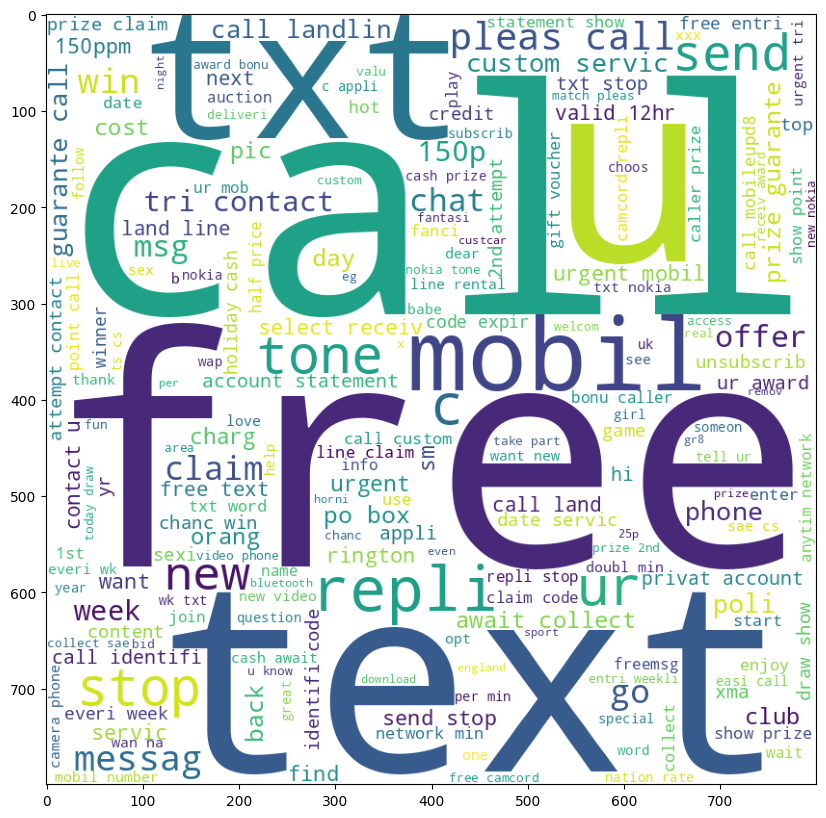

In [ ]:
spam_wc=wc.generate(df[df["target"]==0]["transformed_message"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)
plt.show()

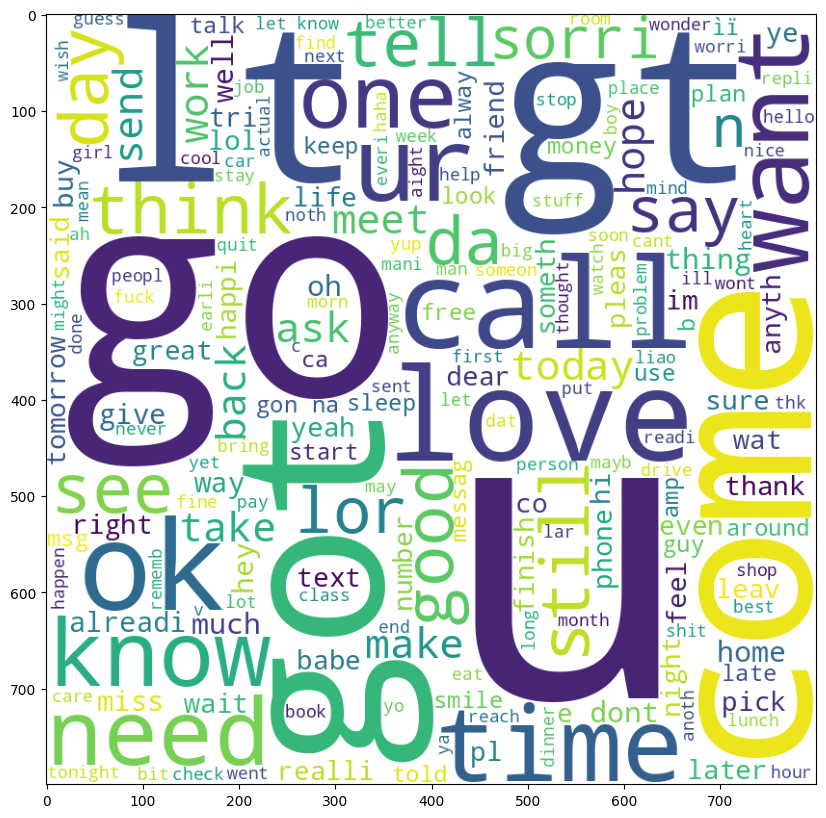

In [ ]:
ham_wc=wc.generate(df[df["target"]==1]["transformed_message"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)
plt.show()

In [ ]:
spam=list()
for msg in df[df['target']==0]["transformed_message"].to_list():
    for word in msg.split():
        spam.append(word)

In [ ]:
len(spam)

9939

In [ ]:
from collections import Counter
spam_top_50=pd.DataFrame(Counter(spam).most_common(50))
print(spam_top_50)

           0    1
0       call  320
1       free  191
2          2  155
3        txt  141
4       text  122
5          u  119
6         ur  119
7      mobil  114
8       stop  104
9      repli  103
10     claim   98
11         4   97
12     prize   82
13       get   74
14       new   64
15    servic   64
16      tone   63
17      send   60
18    urgent   57
19     nokia   57
20   contact   56
21     award   55
22     phone   52
23      cash   51
24     pleas   51
25      week   49
26       win   48
27         c   45
28   collect   45
29       min   45
30    custom   42
31    messag   42
32  guarante   42
33       per   41
34      chat   38
35       tri   37
36       msg   35
37      draw   35
38    number   35
39        cs   35
40      show   33
41     today   33
42     offer   33
43      line   33
44        go   32
45    receiv   31
46      want   31
47    latest   30
48   rington   30
49   landlin   30


In [ ]:
ham=list()
for msg in df[df['target']==1]["transformed_message"].to_list():
    for word in msg.split():
        ham.append(word)

In [ ]:
len(ham)

35404

In [ ]:
ham_top_50=pd.DataFrame(Counter(ham).most_common(50))
print(ham_top_50)

        0    1
0       u  883
1      go  404
2     get  349
3      gt  288
4      lt  287
5       2  284
6    come  275
7     got  236
8    know  236
9    like  234
10   call  233
11   time  219
12     ok  217
13   love  216
14   good  213
15   want  208
16     ur  197
17    day  190
18   need  170
19    one  165
20    lor  159
21      4  156
22   home  152
23  think  149
24    see  147
25   take  143
26  still  143
27     da  142
28   tell  133
29   make  129
30    say  127
31   back  127
32  today  123
33   hope  122
34    ask  121
35  sorri  121
36      n  120
37   send  120
38      r  120
39   work  118
40   dont  118
41   meet  112
42     hi  111
43   well  109
44  thing  109
45    wat  108
46      k  107
47   much  107
48  night  107
49     oh  106


# Models

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cVector=CountVectorizer() #CountVectorizer is used to convert text into numeric array
x=cVector.fit_transform(df["transformed_message"]).toarray()

In [ ]:
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4135, 6708), (4135,), (1034, 6708), (1034,))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

#function to evaluate the performance of model
def evaluate_model_performance(model,x_test,y_test):
    y_pred=model.predict(x_test)
    print("Accurary Score : {}".format(np.round(accuracy_score(y_test,y_pred)*100,decimals=2)))
    print("Precision Score : {}".format(np.round(precision_score(y_test,y_pred)*100,decimals=2)))
    print("Recall Score : {}".format(np.round(recall_score(y_test,y_pred)*100,decimals=2)))
    print("F1 Score : {}".format(np.round(f1_score(y_test,y_pred)*100,decimals=2)))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,fmt="d",annot=True,cmap="rainbow")
    plt.show()
    print("*Classification Report*********************************************")
    print(classification_report(y_test,y_pred))

In [ ]:
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate

lr  :  94.6
nb  :  97.6
svm  :  89.2
knn  :  85.8
cart  :  90.8
rf  :  92.2
ad  :  93.8
gb  :  94.4
xgbc  :  93.8


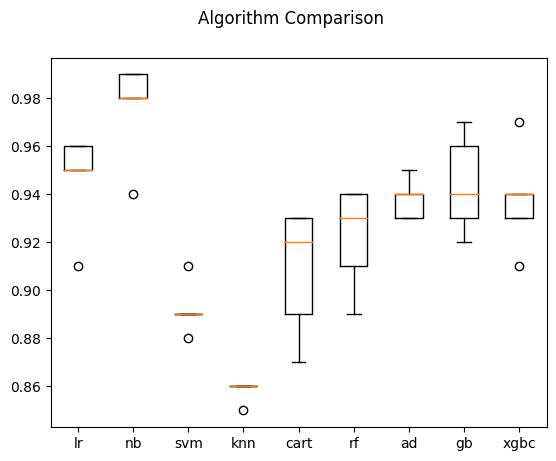

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# Define models
models = {
    "lr":LogisticRegression(),
    "nb":MultinomialNB(),
    "svm":SVC(),
    "knn":KNeighborsClassifier(),
    "cart":DecisionTreeClassifier(),
    "rf":RandomForestClassifier(),
    "ad":AdaBoostClassifier(),
    "gb":GradientBoostingClassifier(),
    "xgbc":XGBClassifier()
}

# Define oversampler for dealing with imbalance
oversampler = RandomOverSampler()

# Define cross-validation strategy for imbalanced data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_scores=list()
# Loop through each model and evaluate its performance
for model_name, model in models.items():
    # Apply oversampling to training data
    X_resampled, y_resampled = oversampler.fit_resample(x, y)

    # Perform cross-validation
    scores = cross_val_score(model, X_resampled[:500], y_resampled[:500], cv=cv, scoring="f1_micro")
    print(model_name," : ",np.round(np.mean(scores)*100,decimals=2))
    model_scores.append(scores)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_scores)
ax.set_xticklabels(models.keys())
plt.show()

In [ ]:
#training our final Multinomial Naive Bayes model
model=MultinomialNB()
model.fit(x_train,y_train)
print("Model Training score : ",model.score(x_train,y_train))

Model Training score :  0.992503022974607


Accurary Score : 97.97
Precision Score : 98.88
Recall Score : 98.77
F1 Score : 98.83


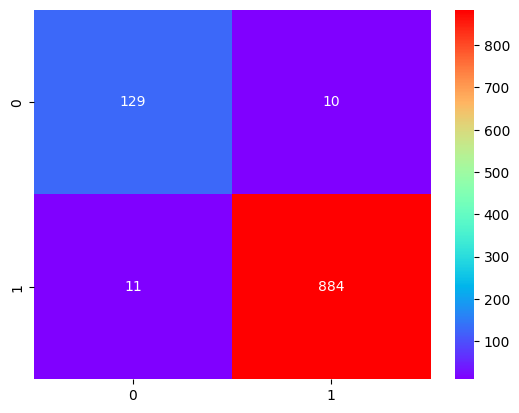

*Classification Report*********************************************
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       139
           1       0.99      0.99      0.99       895

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
#model performance
evaluate_model_performance(model,x_test,y_test)

In [369]:
def prepare_df(dataframe):
  # Removing variables with too many null values
  column_to_delete=[name for name in df.columns if name.startswith('Unnamed')]
  df.drop(columns=column_to_delete,inplace=True)

  # Rename : v1 to target and v2 to message
  df.rename(columns=dict({"v1":"target","v2":"message"}),inplace=True)

  # Drop duplicates
  df.drop_duplicates(inplace=True)

 # Spam : 0 , Not Spam : 1
  df["target"] = df['target'].map({'ham': 1, 'spam': 0})

  df["transformed_message"]=df["message"].apply(transform_message)

  df.drop(columns="message",inplace=True)

  x=cVector.fit_transform(df["transformed_message"]).toarray()

  y=df['target']

  return x,y


In [370]:
def base_model(x,y,scoring="f1_micro"):
  print("Base Models...")
  models = {
    "lr":LogisticRegression(),
    "nb":MultinomialNB(),
    "svm":SVC(),
    "knn":KNeighborsClassifier(),
    "cart":DecisionTreeClassifier(),
    "rf":RandomForestClassifier(),
    "ad":AdaBoostClassifier(),
    "gb":GradientBoostingClassifier(),
    "xgbc":XGBClassifier()}

 # Define oversampler for dealing with imbalance
  oversampler = RandomOverSampler()

# Define cross-validation strategy for imbalanced data
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  model_scores=list()
# Loop through each model and evaluate its performance
  for model_name, model in models.items():
    # Apply oversampling to training data
      X_resampled, y_resampled = oversampler.fit_resample(x, y)

    # Perform cross-validation
      scores = cross_val_score(model, X_resampled[:500], y_resampled[:500], cv=cv, scoring="f1_micro")
      print(model_name," : ",np.round(np.mean(scores)*100,decimals=2))
      model_scores.append(scores)
# boxplot algorithm comparison
  fig = plt.figure()
  fig.suptitle('Algorithm Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(model_scores)
  ax.set_xticklabels(models.keys())
  plt.show()


Base Models...
lr  :  94.6
nb  :  97.6
svm  :  89.2
knn  :  85.8
cart  :  91.6
rf  :  91.6
ad  :  94.2
gb  :  94.2
xgbc  :  93.8


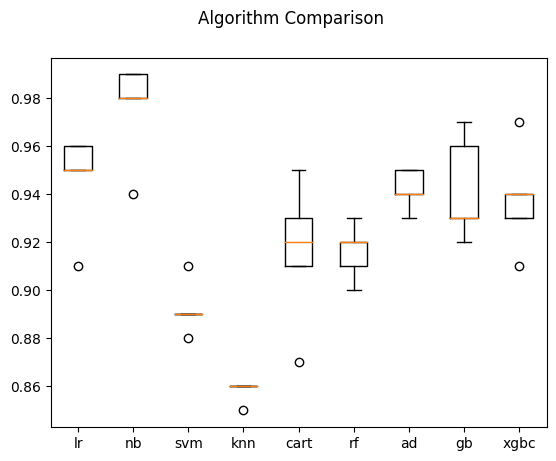

In [371]:
base_model(x,y)

In [372]:
knn_params = {"n_neighbors" : range(2,50)}


rf_params = {"max_depth" : [8,15,None],
             "max_features" : [5,7, "auto"],
             "min_samples_split" : [15,20],
             "n_estimators" : [200,300]}


cart_params = {"max_depth" : range(1,20),
              "min_samples_split" : range(2,30)}

xgboost_params = {"learning_rate" : [0.1, 0.01],
                  "max_depth" : [5,8],
                  "n_estimators" : [100,200],
                  "colsample_bytree" : [0.5,1]}


lightgbm_params = {"learning_rate" : [0.01, 0.1],
                   "n_estimators" : [300, 500],
                  "colsample_bytree" : [0.7, 1] }


In [373]:
classifiers = [

                 ("KNN", KNeighborsClassifier(), knn_params),

                 ("CART", DecisionTreeClassifier(),cart_params ),
                 ("RF", RandomForestClassifier(), rf_params),

                 ("XGBoost", XGBClassifier( eval_metric="logloss"), xgboost_params),
                 ("LightGBM", LGBMClassifier(),lightgbm_params)]

In [374]:
def hyperparameter_optimization(X, y, cv=2, scoring="roc_auc"):
  print(" Hyper Parameters Optimization")
  best_models = {}

  for name, classifier, params in classifiers:
    print(f"################ {name} #####################")
    cv_results = cross_validate(classifier, X, y, cv=2, scoring=scoring)
    #print("###### BEFORE ######")
    print(f"{scoring} ( BEFORE ) {round(cv_results['test_score'].mean(),4)}, ({name})")

    gs = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X,y)
    final_model = classifier.set_params(**gs.best_params_)

    cv_results = cross_validate(final_model, X, y, cv=2, scoring=scoring)
    #print("###### AFTER ######")
    print(f"{scoring} ( AFTER ) {round(cv_results['test_score'].mean(),4)}, ({name})")
    print(f"{name} best params :   {gs.best_params_} ", end="\n\n")
    best_models[name] = final_model


  return best_models



In [ ]:
best_models = hyperparameter_optimization(x,y)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
def voting_classifier(best_models, x, y):
  print("Voting Classifier...", end="\n")

  voting_clf = VotingClassifier(estimators=[("KNN", best_models["KNN"]),
                                           ("RF", best_models["RF"]),    # Bagging
                                            ("LightGBM", best_models["LightGBM"])],  # Boasting
                                voting="soft").fit(x,y)


  cv_results = cross_validate(voting_clf, x, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
  print(f"Accuracy :    {cv_results['test_accuracy'].mean()}")
  print(f"F1 :    {cv_results['test_f1'].mean()}")
  print(f"roc_auc :    {cv_results['test_roc_auc'].mean()}")

  return voting_clf

In [ ]:
voting_clf = voting_classifier(best_models, x, y)



In [ ]:
import joblib

In [ ]:
joblib.dump(voting_clf, "voting_clf.pkl")

In [ ]:
new_model = joblib.load("voting_clf.pkl")


In [ ]:
def main():
  df = pd.read_csv("spam.csv", encoding='latin-1')
  x, y = prepare_df(df)

  base_model(x,y)
  best_models = hyperparameter_optimization(x,y)

  voting_clf = voting_classifier(best_models, x, y)
  joblib.dump(voting_clf, "voting_clf.pkl")

  return voting_clf


In [ ]:
if __name__ == "__main__":
  main()